# Análise das Demonstrações Contábeis - C&A S.A.


## História

C&A é uma cadeia internacional de lojas de vestuário. No Brasil, é uma das maiores redes de lojas de departamento do país e a décima segunda maior empresa varejista, segundo ranking do Ibevar em 2012. Foi fundada nos Países Baixos em 1841 pelos irmãos Clemens e August (daí C&A) como uma empresa têxtil. A C&A foi a primeira empresa do varejo de moda no país a incluir temas voltados à sustentabilidade em suas campanhas, tendo como meta ser uma plataforma para as pessoas se expressarem e oferecer moda com impacto positivo. A rede ainda tem uma Loja Eco, localizada no Centro Histórico de Porto Alegre, com projeto que faz parte das iniciativas que priorizam a sustentabilidade.

## Demonstrações a serem analisadas

O objetivo do relatório financeiro para fins gerais é fornecer informações financeiras sobre a entidade que reporta que sejam úteis aos investidores, credores por empréstimos e outros credores, existentes e potenciais, na tomada de decisões referente à oferta de recursos à entidade.

 (a) comprar, vender ou manter instrumento de patrimônio e de dívida;  
 (b) conceder ou liquidar empréstimos ou outras formas de crédito; ou  
 (c) exercer direitos de votar ou de outro modo influenciar os atos da administração que afetam o uso dos recursos econômicos da entidade.
 
### Balanço Patrimonial

O balanço patrimonial da entidade é a relação de seus ativos, passivos e patrimônio líquido em uma data  específica, como apresentado nessa demonstração da posição patrimonial e financeira.

Eles são definidos da seguinte maneira:  

**Ativo** é um recurso controlado pela entidade como resultado de eventos passados e do qual se espera que benefícios econômicos futuros fluam para a entidade.  
**Passivo** é uma obrigação atual da entidade como resultado de eventos já ocorridos, cuja liquidação se espera resulte na saída de recursos econômicos.  
**Patrimônio líquido** é o valor residual dos ativos da entidade após a dedução de todos os seus passivos.

### Demonstração de Resultado do Exercício

A Demonstração do Resultado do Exercício – DRE – é um relatório contábil que evidencia se as operações de uma empresa estão gerando um lucro ou prejuízo, considerando um determinado período de tempo.

In [1]:
''' Importação das bibliotecas '''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# !pip install xlrd

In [3]:
# Leitura do Excel com a base
xls = pd.ExcelFile('balanco_cea.xls')

# xls = pd.read_excel('balanco_cea.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
# Leitura da DRE
dre = pd.read_excel(xls, 'Dem. Result.', header=1)
dre.head()

,,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019,Unnamed: 14,30/09/2018
0,Receita Bruta de Vendas e/ou Serviços,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001
1,Deduções da Receita Bruta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001
2,Receita Líquida de Vendas e/ou Serviços,1197024.000,1862133.248,1339405.952,1175590.016,776076.032,1746993.152,1067150.976,294492.000,976849.984,1722640.896,1251843.968,1269539.968,1041150.976,NaN,0.000
3,Custo de Bens e/ou Serviços Vendidos,-629604.992,-963595.136,-740068.992,-627153.984,-425079.008,-924976.896,-612126.016,-151236.992,-500519.008,-863332.928,-664244.992,-649566.016,-539921.024,NaN,0.000
4,Resultado Bruto,567419.008,898537.920,599337.024,548435.968,350996.992,822015.936,455024.992,143255.008,476331.008,859308.096,587598.976,619974.016,501230.016,NaN,0.000


In [5]:
# Leitura do Balanço Patrimonial
bp = pd.read_excel(xls, 'Bal. Patrim.', header=1)
bp.head()

,Unnamed: 0,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019,31/12/2018,30/09/2018
0,Ativo Total,8256188.928,8672665.600,7613817.856,6963595.776,6797551.104,7309646.848,6778015.744,6498494.976,5798356.992,6037091.840,5547551.744,5572109.824,5432672.768,3478337.024,0.1
1,Ativo Circulante,3626437.888,3929398.016,3084102.912,2898253.056,2968632.064,3519977.984,3093026.048,2823204.096,2062196.992,2999575.040,2195084.032,1919154.048,1772454.016,2195568.896,0.1
2,Caixa e Equivalentes de Caixa,660372.992,1050251.008,969382.016,878958.976,1038470.976,1509159.040,1321683.968,1259009.024,279963.008,447108.992,188732.000,95310.000,134884.000,446006.016,0.1
3,Aplicações Financeiras,3978.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
4,Contas a Receber,986769.024,1145336.064,873107.968,849904.000,576894.976,1063843.968,680848.000,374462.016,690905.024,1151484.032,831689.024,935816.000,755230.976,1142835.968,0.0


In [6]:
# Invertendo os dados da DRE
dre = dre.transpose()
pd.set_option('display.max_columns', None)
dre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
,Receita Bruta de Vendas e/ou Serviços,Deduções da Receita Bruta,Receita Líquida de Vendas e/ou Serviços,Custo de Bens e/ou Serviços Vendidos,Resultado Bruto,Despesas Com Vendas,Despesas Gerais e Administrativas,Perdas pela Não Recuperabilidade de Ativos,Outras Receitas Operacionais,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Não Operacional,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período
31/03/2022,NaN,NaN,1197024.0,-629604.992,567419.008,-559936.0,-175828.0,0.0,10197.0,-12795.0,0.0,-68568.0,41764.0,-110332.0,NaN,NaN,NaN,-239511.008,-484.0,87265.0,NaN,NaN,6.0,-152724.0
31/12/2021,NaN,NaN,1862133.248,-963595.136,898537.92,-603220.992,-142040.992,0.0,37123.984,26370.0,0.0,-30374.0,52539.992,-82914.0,NaN,NaN,NaN,186396.0,19096.0,-51079.0,NaN,NaN,-1.0,154412.0
30/09/2021,NaN,NaN,1339405.952,-740068.992,599337.024,-517232.0,-136083.008,0.0,17174.0,-3815.0,0.0,-41787.0,33558.0,-75345.0,NaN,NaN,NaN,-82406.0,-73.0,326383.008,NaN,NaN,0.0,243904.0
30/06/2021,NaN,NaN,1175590.016,-627153.984,548435.968,-456771.008,-131697.0,0.0,173267.008,-47495.0,0.0,18642.0,73765.0,-55123.0,NaN,NaN,NaN,104382.0,-241.0,-34909.0,NaN,NaN,-1.0,69231.0


In [7]:
# Invertendo os dados do BP
bp = bp.transpose()
pd.set_option('display.max_columns', None)
bp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Aplicações Financeiras Avaliadas a Valor Justo,Aplicações Financeiras Avaliadas ao Custo Amor...,Contas a Receber,Estoques,Ativos Biológicos,Tributos Diferidos,Despesas Antecipadas,Créditos com Partes Relacionadas,Outros Ativos Não Circulantes,Investimentos,Imobilizado,Intangível,Diferido,Passivo Total,Passivo Circulante,Obrigações Sociais e Trabalhistas,Fornecedores,Obrigações Fiscais,Empréstimos e Financiamentos,Passivos com Partes Relacionadas,Dividendos e JCP a Pagar,Outros,Provisões,Passivos sobre Ativos Não-Correntes a Venda e ...,Passivo Não Circulante,Empréstimos e Financiamentos,Passivos com Partes Relacionadas,Outros,Tributos Diferidos,Adiantamento para Futuro Aumento Capital,Provisões,Passivos sobre Ativos Não-Correntes a Venda e ...,Lucros e Receitas a Apropriar,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
31/03/2022,8256188.928,3626437.888,660372.992,3978.0,986769.024,979769.984,0.0,936585.984,0.0,58962.0,1266450.944,3978.0,0.0,0.0,0.0,0.0,0.0,475718.016,0.0,118.0,0.0,2397442.048,965857.984,0.0,8256188.928,2381594.112,160656.0,1291227.008,91235.0,195286.0,100917.0,1.0,542272.024,0.0,0.0,3048648.96,1514958.976,0.0,1359408.0,0.0,0.0,174282.0,0.0,0.0,-3.0,2825949.112,1847176.96,28899.0,0.0,1121577.984,-152724.0,0.0,0.0,-18981.0,0.0
31/12/2021,8672665.6,3929398.016,1050251.008,0.0,1145336.064,849268.992,0.0,849155.008,0.0,35387.0,1291014.016,7776.0,0.0,0.0,0.0,0.0,0.0,378803.008,0.0,133.0,0.0,2476559.104,975694.976,0.0,8672665.6,2415055.104,155470.0,1400736.0,176103.008,121178.0,59016.0,1.0,502551.0,0.0,0.0,3262601.984,1253648.0,0.0,1839427.968,0.0,0.0,169526.0,0.0,0.0,3.0,2995006.024,1847176.96,26499.0,0.0,1121577.984,0.0,0.0,0.0,-248.0,0.0
30/09/2021,7613817.856,3084102.912,969382.016,0.0,873107.968,882753.024,0.0,314880.992,0.0,43979.0,1815943.936,0.0,0.0,0.0,0.0,0.0,0.0,429099.008,0.0,147.0,0.0,2311088.128,402683.008,0.0,7613817.856,1901385.984,158640.0,1061688.0,51761.0,105901.0,34177.0,0.0,489219.008,0.0,0.0,2871225.088,1268824.96,0.0,1405273.984,0.0,0.0,197126.0,0.0,0.0,2.0,2841205.04,1847176.96,25590.0,0.0,800268.992,166896.992,0.0,0.0,1272.0,0.0
30/06/2021,6963595.776,2898253.056,878958.976,0.0,849904.0,862403.968,0.0,274257.984,0.0,32728.0,1519372.032,0.0,0.0,0.0,0.0,0.0,0.0,105346.0,0.0,161.0,0.0,2181661.952,364308.992,0.0,6963595.776,1585559.04,129534.0,847972.992,42555.0,69142.0,22215.0,0.0,474140.0,0.0,0.0,2788231.936,1280205.952,0.0,1313586.048,0.0,0.0,194440.0,0.0,0.0,2.0,2589803.056,1847176.96,23198.0,0.0,796889.984,-73628.0,0.0,0.0,-3834.0,0.0


## Índice da Empresa 

### Índices de Liquidez 

Esses indices são usados para avaliar a capacidade de pagamento da empresa, isto é, constituem uma apreciação sobre a capacidade de saldar com os seus compromissos.

#### Liquidez Corrente (LC)

Liquidez corrente é um indicador financeiro que mostra a capacidade de uma empresa de quitar todas suas dívidas a curto prazo.

 - **Liquidez Corrente** = $ LC = \frac{Ativo \; Circulante}{Passivo \; Circulante} $

  > **Interpretação:** Para cada RS 1,00 de Passivo a empresa tem RS X de Ativos para liquidar as obrigações de curto prazo. `Quanto maior melhor!`

#### Liquidez Seca (LS)

A liquidez seca considera, portanto, os valores de que a empresa dispõe para pagar suas contas no curto prazo ainda que não consiga vender nada do que tem estocado.

  - Liquidez Seca = $ LS = \frac{Ativo \; Circulante - Estoque}{Passivo \; Circulante} $ 

  > **Interpretação:** Para cada RS 1,00 de Passivo eu tenho RS X de Ativos menos estoques para liquidar as minhas obrigações de curto prazo. Quanto maior melhor!

#### Liquidez Geral (LG)

A Liquidez Geral mostra a capacidade de pagamento da empresa no longo prazo, considerando tudo que ela converterá em dinheiro a curto e longo prazo considerando tudo que ela ja assumiu de dívida.

 - Liquidez Geral = $ LG = \frac{Ativo \; Circulante + Ativo \; não \;Circulante}{Passivo \; + Passivo \; não \; Circulante } $
 
 > **Interpretação** Para cada RS 1,00 de dívida a curto e a longo prazo, a empresa dispõe de RS X e de valores que se converterão em dinheiro a curto e a longo prazo.
 
---

## Indice de Endividamento

É por meio desses indicadores que apreciaremos o nível de endividamento da empresa. Também são os indicadores de endividamento que nos informam se a empresa se utiliza mais de recursos de terceiros ou de recursos dos proprietários.

A análise da composição do endividamento também é bastante significativa:

 - Endividamento a Curto Prazo, normalmente utilizado para financiar o Ativo Circulante;

 - Endividamento a Longo Prazo, normalmente utilizado para financiar o Ativo Permanente.

### Composição do Endividamento

Por outro lado, investidores devem utilizar esse indicador de composição do endividamento para identificar se determinada empresa terá condições de honrar com suas obrigações de curto prazo.

 - **Composição do Endividamento** $ ICE = \frac{Passivo \; Circulante}{Passivo + Passivo \;não \;Circulante} $

  > **Interpretação** De modo geral, quanto menor a CE, melhor para a empresa. Isso ocorre porque ela  deverá desembolsar menos capital no curto prazo para o pagamento de dívidas.

### Imobilização do Patrimônio Líquido

 A imobilização do patrimônio líquido (também conhecida como imobilização do capital próprio ou pela sigla IPL) é um indicador contábil que demonstra o quanto dos recursos a empresa aplica no ativo permanente.
 
 -  **Imobilização do PL** = $ IPL = \frac{Ativo \; Permanente}{Patrimonio \; Liquido} $
  
  > **Interpretação**  A medida do IPL avaliará a relação da imobilização do capital próprio. Quanto maior o resultado do índice, maior será esse grau.
  
### Grau de Endividamento

O Índice de Endividamento Geral (EG) é a representação da proporção do passivo exigível da empresa dividido pelo ativo total, ou seja, por dívidas que devem ser liquidados em data futura.  

 - Grau de Endividamento = $ GE = \frac{Passivo \;Circulante + Passivo \;não \;Circulante}{Ativo \;Total} $
 
 > **Interpretação** Esse índice pode mostrar se uma empresa está tendo um endividamento muito alto, no geral, não existe um número correto para o endividamento, mas quanto maior o grau, maior o custo com a dívida, o que pode impactar o lucro líquido da empresa e pode representar uma oportunidade, existem empresas que se valem de capital de terceiros para conseguir ter um crescimento acelerado, isso cria a oportunidade para um sócio capitalista, trazer capital para a empresa e diminuir os custos financeiros, tornando a empresa rentável. Fonte: [Hubcount](https://ajuda.hubcount.com.br/pt-BR/articles/3422194-grau-de-endividamento)
 
### O que é Termômetro de Kanitz?

Também chamado de Índice de Kanitz ou Escala de Kanitz, o Termômetro de Kanitz é um instrumento usado para prever a possibilidade de falência de empresas com base em alguns índices financeiros que já já eu vou detalhar para você. 

Esse método foi criado pelo professor e economista brasileiro Stephen Charles Kanitz nos anos 70. 

 - Termometro de Kanitz = $ Kanitz = (0.05xRP + 1.65xLG + 3.55xLS) - (1.06*LC + 0.33xGE) $ 
 
 > **Interpretação** Seguindo a escala podemos avaliar o risco de falência de uma empresa:  
 >> Menor do que -3: Alto risco de falência;  
 >> Entre -3 e 0: Área de atenção;  
 >> Entre 0 e 7: Empresa com solvência;  
 >> Maior que 7: Empresa excelente.  

---

## Indice de Rentabilidade

### Rentabilidade da empresa × Rentabilidade do empresário (ROI × ROE)

Em inglês, ROI é Return On Investment (Retorno sobre Investimento, que é a mesma coisa que Retorno sobre Ativo ou TRI); ROE é Return On Equity (Retorno sobre o Capital Investido pelos proprietários, que é a mesma coisa que Retorno sobre Patrimônio Líquido ou TRPL). 

 - ROE = $ ROE = \frac{Lucro \;Líquido}{Patrimônio \; Líquido} $
 
 > **Interpretação** Poder de ganho da empresa: para cada RS 1,00 investido há um ganho de RS X.
 
 - ROI = $ ROI = \frac{Lucro \;Líquido}{Ativo} $
 
 > **Interpretação** Poder de ganho da empresa: para cada RS 1,00 investido há um ganho de RS X.

Fontes: [HubCount](https://ajuda.hubcount.com.br/pt-BR/articles/3403754-indice-de-kanitz)  
Fontes: [Gestta](https://www.gestta.com.br/termometro-de-kanitz-prevendo-riscos-de-falencia/)  
Fonte: [Marion, J. C. Análise das Demonstrações Contábeis, Editora Atlas, 2019](https://integrada.minhabiblioteca.com.br/reader/books/9788597021264/epubcfi/6/10[%3Bvnd.vst.idref%3Dcopyright]!/4/16/1:71[des%2Cte%20])

In [8]:
# Coletando a informação BP
indice_lc = bp.iloc[:,[0, 1, 5, 10, 21, 22, 25, 35, 45] ]

# Renomeando a Coluna
indice_lc = indice_lc.rename(columns={0: 'AT', 1: 'AC', 5: 'Estoque', 10: 'ARLP', 21: 'Permanente', 22: 'Intangivel', # Contas Ativo
                                      25: 'PC', 35: 'PNC', 45: 'PL'} ) # Contas Passivo

# Removendo a primeira linha
indice_lc = indice_lc.drop(indice_lc.index[[0]])

# Coletando a informação DRE
dre_df = dre.iloc[:,[2, 4, 23]]
# Renomeando a Coluna
dre_df = dre_df.rename(columns={2: 'Receita', 4: 'LB', 23: 'LL'})

# Removendo a primeira linha
dre_df = dre_df.drop(dre_df.index[[0]])

#----------------------------------------------------------------------------------------
# Juntando os DFs
indice_lc = pd.concat([dre_df, indice_lc], axis=1, join='inner')


# Convertendo tudo para número
indice_lc = indice_lc.astype('float64')

# ANC = ARLP + IMOB + INT
indice_lc['ANC'] = (indice_lc['ARLP'] + indice_lc['Permanente'] + indice_lc['Intangivel'])
indice_lc['PT'] = (indice_lc['PC'] + indice_lc['PNC'] + indice_lc['PL'])

# impacto dos indicadores de endividamento no wacc

# cross section

indice_lc
indice_lc.head().T

,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021
Receita,1197024.000,1862133.248,1339405.952,1175590.016,776076.032
LB,567419.008,898537.920,599337.024,548435.968,350996.992
LL,-152724.000,154412.000,243904.000,69231.000,-138539.008
AT,8256188.928,8672665.600,7613817.856,6963595.776,6797551.104
AC,3626437.888,3929398.016,3084102.912,2898253.056,2968632.064
Estoque,979769.984,849268.992,882753.024,862403.968,939016.000
ARLP,1266450.944,1291014.016,1815943.936,1519372.032,1371380.992
Permanente,2397442.048,2476559.104,2311088.128,2181661.952,2142003.968
Intangivel,965857.984,975694.976,402683.008,364308.992,315534.016
PC,2381594.112,2415055.104,1901385.984,1585559.040,1975019.008


In [9]:
# Cálculo do indice de liquidez corrente
indice_lc['ilc'] = round(indice_lc['AC'] / indice_lc['PC'],2)
# Cálculo do indice de Liquidez seca
indice_lc['ils'] = round((indice_lc['AC'] - indice_lc['Estoque']) / indice_lc['PC'],2)
# Calculando o Indice de Liquidez Geral
indice_lc['ilg'] = round( (indice_lc['AC'] + indice_lc['ANC']) / (indice_lc['PC'] + indice_lc['PNC']), 2 )

#-------------------------------------------------------------------------------------------------------
# Endividamento de curto prazo em relação ao endividamento de longo prazo
indice_lc['icc'] = round(indice_lc['PC'] / indice_lc['PNC'], 2)
# Imobilização do PL
indice_lc['ipl'] = round( (indice_lc['Permanente'] + indice_lc['Intangivel']) / indice_lc['PL'], 2)
# Grau de endividamento
indice_lc['ge'] = round( (indice_lc['PC'] + indice_lc['PNC']) / indice_lc['AT'], 2 )


#-------------------------------------------------------------------------------------------------------
# ROE
indice_lc['roe'] = round(indice_lc['Receita'] / indice_lc['PL'], 2)
indice_lc['paybackRoe'] = abs(1/indice_lc['roe'])/4

# ROA = Lucro Líquido / Ativo Total
indice_lc['roa'] = (indice_lc['LL'] / indice_lc['AT'])
indice_lc['paybackRoa'] = abs(1/indice_lc['roa'])/4
    
# Kanitz - indice de solvência
indice_lc['kanitz'] = round(
    (indice_lc['roe'] * 0.05 +  # Rentabilidade do PL
    indice_lc['ilg'] * 1.65 +   # Liquidez Geral
    indice_lc['ils'] * 3.55) -  # Liquidez Seca
    (indice_lc['ilc'] * 1.60 -  # Liquidez Corrente 
    indice_lc['ge'] * 0.33), 2  # Grau de Endividamento
)

# Giro do Ativo
indice_lc['giro'] = (indice_lc['Receita'] / indice_lc['AT'])

# Margem Bruta
indice_lc['mb'] = (indice_lc['LB'] / indice_lc['Receita'])

# Margem Líquida
indice_lc['ml'] = (indice_lc['LL'] / indice_lc['Receita'])


indice_lc.head()

,Receita,LB,LL,AT,AC,Estoque,ARLP,Permanente,Intangivel,PC,PNC,PL,ANC,PT,ilc,ils,ilg,icc,ipl,ge,roe,paybackRoe,roa,paybackRoa,kanitz,giro,mb,ml
31/03/2022,1197024.000,567419.008,-152724.000,8256188.928,3626437.888,979769.984,1266450.944,2397442.048,965857.984,2381594.112,3048648.960,2825949.112,4629750.976,8256192.184,1.52,1.11,1.52,0.78,1.19,0.66,0.42,0.595238,-0.018498,13.514885,4.26,0.144985,0.474025,-0.127586
31/12/2021,1862133.248,898537.920,154412.000,8672665.600,3929398.016,849268.992,1291014.016,2476559.104,975694.976,2415055.104,3262601.984,2995006.024,4743268.096,8672663.112,1.63,1.28,1.53,0.74,1.15,0.65,0.62,0.403226,0.017804,14.041437,4.71,0.214713,0.482531,0.082922
30/09/2021,1339405.952,599337.024,243904.000,7613817.856,3084102.912,882753.024,1815943.936,2311088.128,402683.008,1901385.984,2871225.088,2841205.040,4529715.072,7613816.112,1.62,1.16,1.60,0.66,0.96,0.63,0.47,0.531915,0.032034,7.804113,4.40,0.175918,0.447465,0.182099
30/06/2021,1175590.016,548435.968,69231.000,6963595.776,2898253.056,862403.968,1519372.032,2181661.952,364308.992,1585559.040,2788231.936,2589803.056,4065342.976,6963594.032,1.83,1.28,1.59,0.57,0.98,0.63,0.45,0.555556,0.009942,25.146234,4.47,0.168819,0.466520,0.058890
31/03/2021,776076.032,350996.992,-138539.008,6797551.104,2968632.064,939016.000,1371380.992,2142003.968,315534.016,1975019.008,2298100.992,2524430.104,3828918.976,6797550.104,1.50,1.03,1.59,0.86,0.97,0.63,0.31,0.806452,-0.020381,12.266493,4.10,0.114170,0.452271,-0.178512


In [10]:
# indice_lc = indice_lc[['AC', 'ANC', 'PC', 'PNC', 'PL', 'ilc','ils','ilg','icc','ipl', 'roe', 'roa', 'giro', 'ml', 'mb', 'kanitz']]
# indice_lc

In [11]:
# Análise Vertical: Ativo em percentual
indice_lc['per_AC'] = (indice_lc['AC'] / indice_lc['AT']) * 100
indice_lc['per_ANC'] = (indice_lc['ANC'] / indice_lc['AT']) * 100
# indice_lc['per_AT'] = round(indice_lc['per_ANC'] + indice_lc['per_AC'] ,1)

# Analise Vertical: Passivo em percentual
indice_lc['per_PC'] = (indice_lc['PC'] / indice_lc['PT']) * 100
indice_lc['per_PNC'] = (indice_lc['PNC'] / indice_lc['PT']) * 100
indice_lc['per_PL'] = (indice_lc['PL'] / indice_lc['PT']) * 100
# indice_lc['Per_PT'] = round(indice_lc['per_PC'] + indice_lc['per_PNC'] + indice_lc['per_PL'],1)

indice_lc.head()

,Receita,LB,LL,AT,AC,Estoque,ARLP,Permanente,Intangivel,PC,PNC,PL,ANC,PT,ilc,ils,ilg,icc,ipl,ge,roe,paybackRoe,roa,paybackRoa,kanitz,giro,mb,ml,per_AC,per_ANC,per_PC,per_PNC,per_PL
31/03/2022,1197024.000,567419.008,-152724.000,8256188.928,3626437.888,979769.984,1266450.944,2397442.048,965857.984,2381594.112,3048648.960,2825949.112,4629750.976,8256192.184,1.52,1.11,1.52,0.78,1.19,0.66,0.42,0.595238,-0.018498,13.514885,4.26,0.144985,0.474025,-0.127586,43.923872,56.076127,28.846156,36.925606,34.228238
31/12/2021,1862133.248,898537.920,154412.000,8672665.600,3929398.016,849268.992,1291014.016,2476559.104,975694.976,2415055.104,3262601.984,2995006.024,4743268.096,8672663.112,1.63,1.28,1.53,0.74,1.15,0.65,0.62,0.403226,0.017804,14.041437,4.71,0.214713,0.482531,0.082922,45.307846,54.692159,27.846753,37.619379,34.533868
30/09/2021,1339405.952,599337.024,243904.000,7613817.856,3084102.912,882753.024,1815943.936,2311088.128,402683.008,1901385.984,2871225.088,2841205.040,4529715.072,7613816.112,1.62,1.16,1.60,0.66,0.96,0.63,0.47,0.531915,0.032034,7.804113,4.40,0.175918,0.447465,0.182099,40.506655,59.493347,24.972838,37.710723,37.316439
30/06/2021,1175590.016,548435.968,69231.000,6963595.776,2898253.056,862403.968,1519372.032,2181661.952,364308.992,1585559.040,2788231.936,2589803.056,4065342.976,6963594.032,1.83,1.28,1.59,0.57,0.98,0.63,0.45,0.555556,0.009942,25.146234,4.47,0.168819,0.466520,0.058890,41.620065,58.379939,22.769263,40.040128,37.190609
31/03/2021,776076.032,350996.992,-138539.008,6797551.104,2968632.064,939016.000,1371380.992,2142003.968,315534.016,1975019.008,2298100.992,2524430.104,3828918.976,6797550.104,1.50,1.03,1.59,0.86,0.97,0.63,0.31,0.806452,-0.020381,12.266493,4.10,0.114170,0.452271,-0.178512,43.672082,56.327917,29.054865,33.807783,37.137352


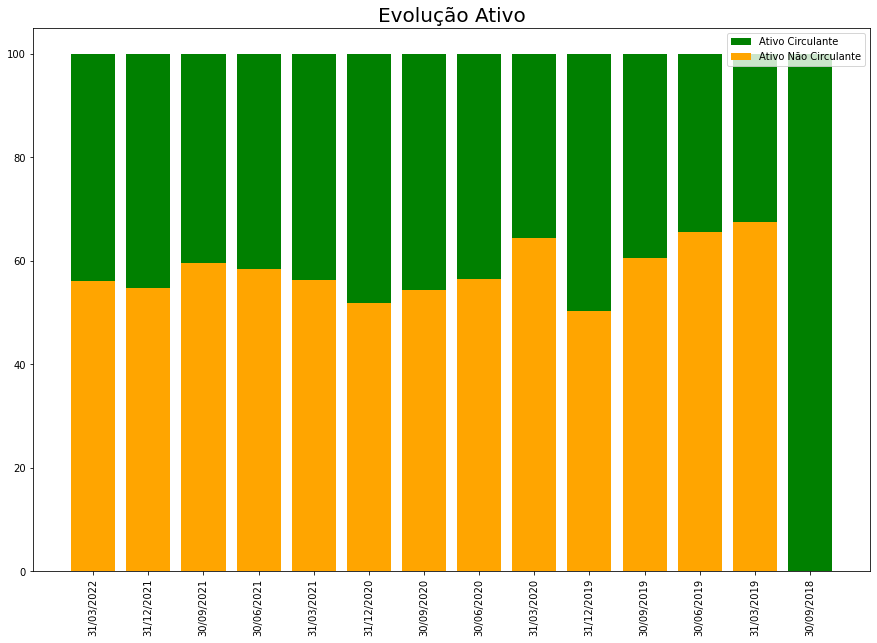

In [12]:
plt.figure(figsize=(15,10))

plt.title('Evolução Ativo', size=20)
plt.bar(indice_lc.index, 
        indice_lc['per_AC'], 
        bottom=np.array(indice_lc['per_ANC']), 
        color='green', 
        label="Ativo Circulante")
plt.bar(indice_lc.index, 
        indice_lc['per_ANC'], 
        color='orange', 
        label="Ativo Não Circulante")
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()

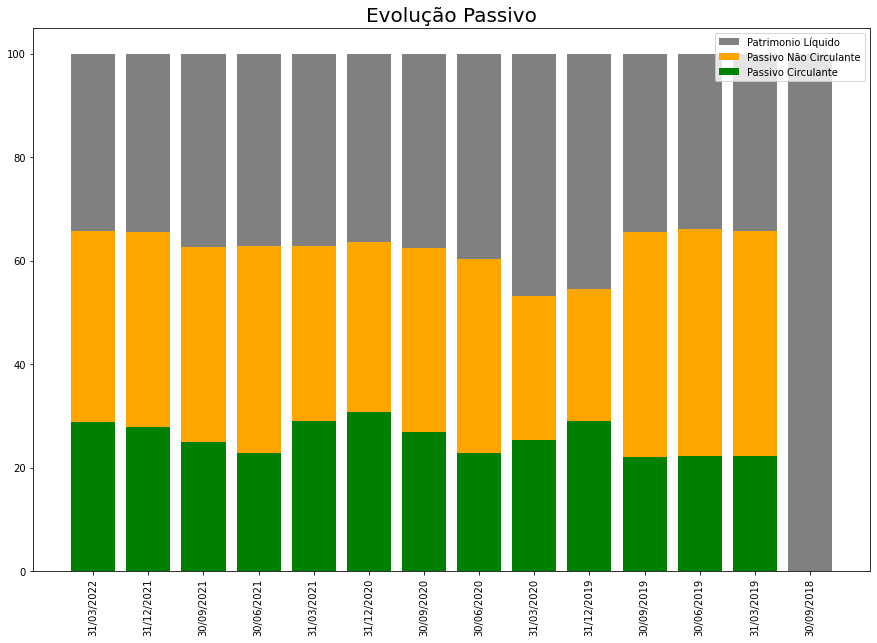

In [13]:
plt.figure(figsize=(15,10))

plt.title('Evolução Passivo', size=20)
plt.bar(indice_lc.index, 
        indice_lc['per_PL'], 
        bottom=np.array(indice_lc['per_PC'])+np.array(indice_lc['per_PNC']), 
        color='grey', 
        label="Patrimonio Líquido")

plt.bar(indice_lc.index, 
        indice_lc['per_PNC'], 
        bottom=np.array(indice_lc['per_PC']),  
        color='orange', 
        label="Passivo Não Circulante")

plt.bar(indice_lc.index, 
        indice_lc['per_PC'], 
        color='green', 
        label="Passivo Circulante")


plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()

In [14]:
bpr = bp.iloc[:,[4,5,27]]
bpr.head()

,4,5,27
Unnamed: 0,Contas a Receber,Estoques,Fornecedores
31/03/2022,986769.024,979769.984,1291227.008
31/12/2021,1145336.064,849268.992,1400736.0
30/09/2021,873107.968,882753.024,1061688.0
30/06/2021,849904.0,862403.968,847972.992


In [15]:
bpr = bpr.rename(columns={4:'clientes',5:'estoques',27:'fornecedores'})
bpr.head()

,clientes,estoques,fornecedores
Unnamed: 0,Contas a Receber,Estoques,Fornecedores
31/03/2022,986769.024,979769.984,1291227.008
31/12/2021,1145336.064,849268.992,1400736.0
30/09/2021,873107.968,882753.024,1061688.0
30/06/2021,849904.0,862403.968,847972.992


In [16]:
bpr = bpr.drop(bpr.index[[0]])
bpr.head()

,clientes,estoques,fornecedores
31/03/2022,986769.024,979769.984,1291227.008
31/12/2021,1145336.064,849268.992,1400736.0
30/09/2021,873107.968,882753.024,1061688.0
30/06/2021,849904.0,862403.968,847972.992
31/03/2021,576894.976,939016.0,918985.984


In [17]:
drer = dre.iloc[:,[2,3]]
drer.head()

,2,3
,Receita Líquida de Vendas e/ou Serviços,Custo de Bens e/ou Serviços Vendidos
31/03/2022,1197024.0,-629604.992
31/12/2021,1862133.248,-963595.136
30/09/2021,1339405.952,-740068.992
30/06/2021,1175590.016,-627153.984


In [18]:
drer = drer.rename(columns={2:'receita_liquida',3:'custo'})
drer.head()

,receita_liquida,custo
,Receita Líquida de Vendas e/ou Serviços,Custo de Bens e/ou Serviços Vendidos
31/03/2022,1197024.0,-629604.992
31/12/2021,1862133.248,-963595.136
30/09/2021,1339405.952,-740068.992
30/06/2021,1175590.016,-627153.984


In [19]:
drer = drer.drop(drer.index[[0]])
drer.head()

,receita_liquida,custo
31/03/2022,1197024.0,-629604.992
31/12/2021,1862133.248,-963595.136
30/09/2021,1339405.952,-740068.992
30/06/2021,1175590.016,-627153.984
31/03/2021,776076.032,-425079.008


In [20]:
print(drer['receita_liquida'].isnull().sum())
print(drer['custo'].isnull().sum())

1
1


In [21]:
index_para_dropar = drer.loc[drer['receita_liquida'] == 0,['receita_liquida', 'custo']].index

In [22]:
index_para_dropar

Index(['30/09/2018'], dtype='object')

In [23]:
drer.drop(index_para_dropar, axis=0, inplace=True)
drer.drop(drer.index[[-1]], inplace=True)

In [24]:
print(bpr['clientes'].isnull().sum())
print(bpr['estoques'].isnull().sum())
print(bpr['fornecedores'].isnull().sum())

0
0
0


In [25]:
bpr.drop(index_para_dropar, inplace=True)
bpr.drop(bpr.index[[-1]], inplace=True)

## Indices de Atividade

Os indices de atividade servem para avaliar a performance das operações da empresa e seus investimentos. Por meio dos prazos médios pode-se analisar o ciclo operacional e de caixa da entidade, “elementos fundamentais para a determinação de estratégias empresariais, tanto comerciais quanto financeiras, geralmente vitais para a determinação do fracasso ou do sucesso de uma empresa” (MATARAZZO, 2010, p. 260). 

### Prazo Médio de Estoque (PME)

O Prazo Médio de Estoque (PME) é utilizado para avaliar o tempo médio do estoque desde a compra de materia prima, a transformação em produto e consequentemente a venda da mercadoria. Para se achar o prazo médio em ano multiplica-se por 365, por trimestre 90, etc.

$$ PME = \frac{Estoque}{Custos} * 90 $$

### Prazo Médio de Recebimento (PMR)

O Prazo Médio de Recebimento (PMR) é o prazo médio em que a empresa vende a mercadoria até o momento em que recebe suas vendas a prazo.

$$ PMR = \frac{Clientes}{Receita \;de \;Vendas} * 90 $$ 

### Prazo Médio de Pagamento (PMP)

O prazo médio de pagamento a fornecedores, ou prazo médio de pagamento de compras.

$$ PMP = \frac{Fornecedores}{Compras} * 90 $$

Fonte: [Diniz, J. A.; Martins, E.; Miranda G. J. **Análise Didática das Desmontrações Contábeis**, Editora Atlas, Rio de Janeiro, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788597025439/epubcfi/6/2[%3Bvnd.vst.idref%3Dcover]!/4/2/2%4050:1)

In [26]:
pme = abs((bpr.estoques/drer.custo)*90)
pme

31/03/2022    140.054955
31/12/2021     79.321913
30/09/2021    107.351846
30/06/2021    123.759649
31/03/2021    198.813487
31/12/2020     62.371074
30/09/2020    112.060747
30/06/2020    482.193343
31/03/2020    141.016109
31/12/2019     56.785196
30/09/2019     79.522661
30/06/2019     83.919415
31/03/2019    100.881751
dtype: object

In [27]:
pmr = abs((bpr.clientes/drer.receita_liquida)*90)
pmr

31/03/2022     74.191672
31/12/2021     55.355999
30/09/2021     58.667588
30/06/2021     65.066357
31/03/2021     66.901368
31/12/2020     54.806143
30/09/2020     57.420479
30/06/2020    114.439718
31/03/2020     63.655068
31/12/2019     60.159702
30/09/2019     59.793404
30/06/2019       66.3417
31/03/2019     65.284276
dtype: object

In [28]:
pmp = abs((bpr.fornecedores/drer.custo)*90)
pmp

31/03/2022     184.57673
31/12/2021    130.829054
30/09/2021    129.112179
30/06/2021    121.688726
31/03/2021    194.572625
31/12/2020    112.762021
30/09/2020    106.660833
30/06/2020    247.525746
31/03/2020    112.949932
31/12/2019     83.816066
30/09/2019     78.853464
30/06/2019     86.931442
31/03/2019     94.912377
dtype: object

## Ciclo Operacional e Ciclo Financeiro


Os Ciclos Financeiro e Operacional abrangem a visão do gestor financeiro com relação às entradas e saídas de recursos.

### Ciclo Operacional 

Quando falamos em gestão financeira, o conceito de **Ciclo Operacional** é a soma de todos os acontecimentos referentes a uma operação empresarial (inicia com a compra de matéria-prima, passa pela produção, avançando pela venda do produto e vai até o recebimento relacionado às vendas realizadas).

Para tirar sua dúvida de como calcular o  Ciclo Operacional, comece pela fórmula:

$$ CICLO \; OPERACIONAL = Prazo \; Médio\; de\; Estocagem\; (PME)\; +\; Prazo\; Médio\; de\; Recebimento\; (PMR) $$

### Ciclo de Caixa

O Ciclo de Conversão de Caixa, ou Ciclo de Caixa, como também é chamado, é o tempo entre o pagamento dos fornecedores até o recebimento dos valores recebidos pela venda dos produtos (data de pagamento, não data de compra feita pelo cliente).

$$ CICLO \;DE \;CAIXA = CO - PMP $$



In [29]:
co = pme+pmr
co

31/03/2022    214.246627
31/12/2021    134.677911
30/09/2021    166.019434
30/06/2021    188.826007
31/03/2021    265.714855
31/12/2020    117.177218
30/09/2020    169.481226
30/06/2020    596.633061
31/03/2020    204.671177
31/12/2019    116.944898
30/09/2019    139.316065
30/06/2019    150.261115
31/03/2019    166.166028
dtype: object

In [30]:
cc = co - pmp
cc

31/03/2022     29.669897
31/12/2021      3.848858
30/09/2021     36.907255
30/06/2021     67.137281
31/03/2021      71.14223
31/12/2020      4.415197
30/09/2020     62.820393
30/06/2020    349.107315
31/03/2020     91.721245
31/12/2019     33.128832
30/09/2019     60.462601
30/06/2019     63.329673
31/03/2019     71.253651
dtype: object

In [31]:
girofinanceiro = 360 / cc
girofinanceiro

31/03/2022     12.13351
31/12/2021    93.534248
30/09/2021      9.75418
30/06/2021     5.362147
31/03/2021     5.060286
31/12/2020    81.536572
30/09/2020     5.730623
30/06/2020     1.031202
31/03/2020     3.924936
31/12/2019    10.866667
30/09/2019     5.954094
30/06/2019     5.684539
31/03/2019     5.052373
dtype: object

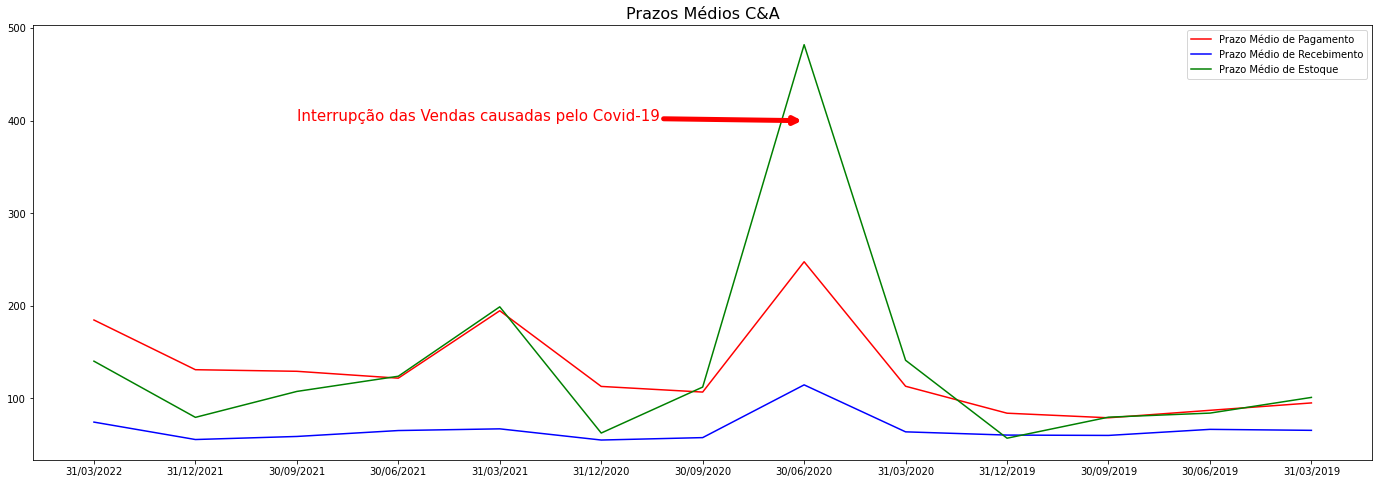

In [32]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111) 
plt.title('Prazos Médios C&A', size = 16)
plt.plot(pmp, "red")
plt.plot(pmr, "blue")
plt.plot(pme, "green")
arrowprops=dict(arrowstyle='->', 
                color='red', 
                linewidth=5, 
                mutation_scale=15)
ax.annotate('Interrupção das Vendas causadas pelo Covid-19', 
            xy = ('30/06/2020', 400), fontsize=15, color='red',
            xytext=(2, 400), arrowprops=arrowprops)
plt.legend(['Prazo Médio de Pagamento', 
            'Prazo Médio de Recebimento', 
            'Prazo Médio de Estoque'], loc='upper right')
plt.show()

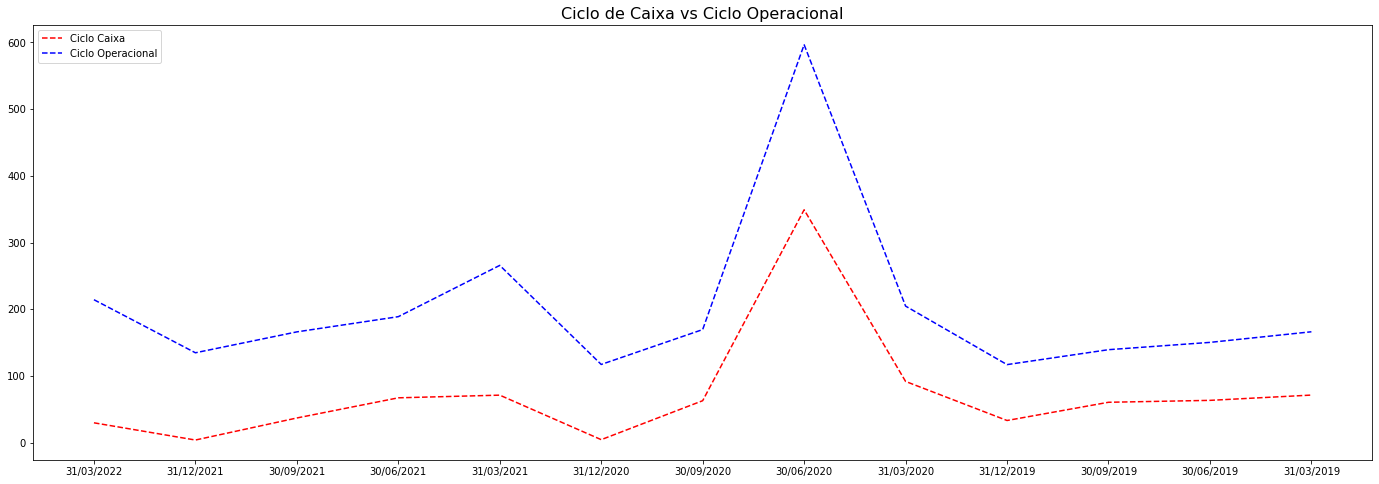

In [33]:
plt.figure(figsize=(24,8))
plt.title('Ciclo de Caixa vs Ciclo Operacional', size = 16)
plt.plot(cc, '--', color='red')
plt.plot(co, '--', color='blue')
plt.legend(['Ciclo Caixa', 'Ciclo Operacional'], loc='upper left')
plt.show()

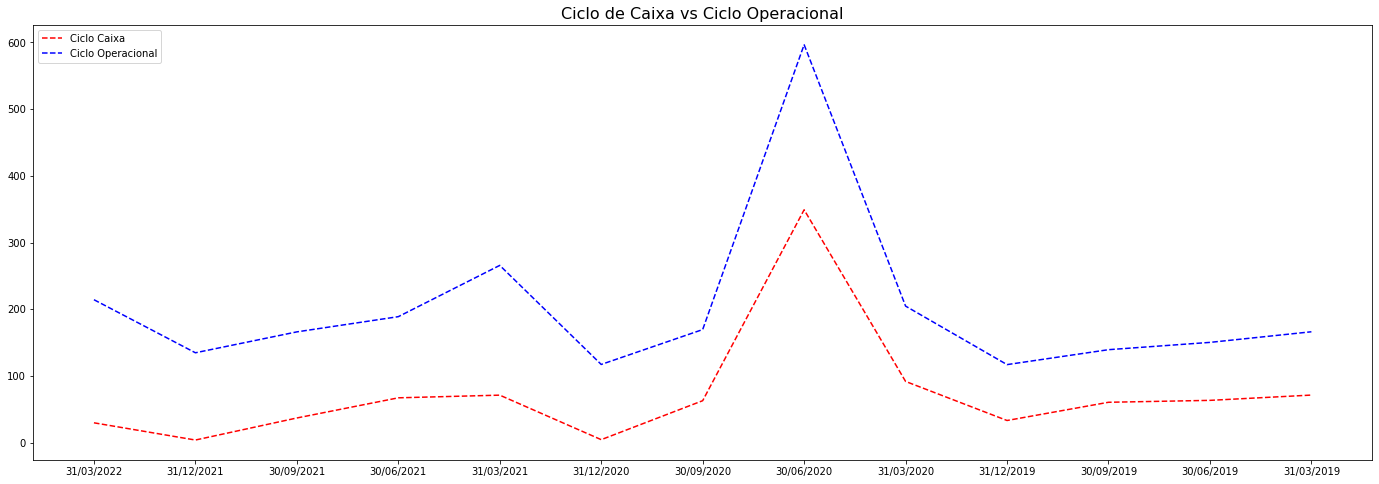

In [34]:
plt.figure(figsize=(24,8))
plt.title('Ciclo de Caixa vs Ciclo Operacional', size = 16)
plt.plot(cc, '--', color='red')
plt.plot(co, '--', color='blue')
plt.legend(['Ciclo Caixa', 'Ciclo Operacional'], loc='upper left')
plt.show()

# Parte dois

In [35]:
bp2 = bp.iloc[:,[0,29,36,45]]
bp2 = bp2.rename(columns={0 :"Ativo_Total",29:"Emprestimos_Financiamentos_cp", 36:"Emprestimos_Financiamentos_lp", 45:"Patrimonio_Liquido"})
bp2 = bp2.drop(bp2.index[[0]])
bp2.drop(index_para_dropar, axis=0, inplace=True)
bp2.drop(bp2.index[[-1]], inplace=True)

In [36]:
dre2 = dre.iloc[:,[2,3,13]]
dre2 = dre2.rename(columns={2 :"Receita",3:"Custo", 13:"Despesa"})
dre2 = dre2.drop(dre2.index[[0]])
dre2.drop(index_para_dropar, axis=0, inplace=True)
dre2.drop(dre2.index[[-1]], inplace=True)

In [37]:
dre2.shape

(13, 3)

In [38]:
bp2.shape

(13, 4)

In [39]:
bp_dr = pd.concat([dre2, bp2], axis=1, join='inner')

In [40]:
bp_dr.T

,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019
Receita,1197024.0,1862133.248,1339405.952,1175590.016,776076.032,1746993.152,1067150.976,294492.0,976849.984,1722640.896,1251843.968,1269539.968,1041150.976
Custo,-629604.992,-963595.136,-740068.992,-627153.984,-425079.008,-924976.896,-612126.016,-151236.992,-500519.008,-863332.928,-664244.992,-649566.016,-539921.024
Despesa,-110332.0,-82914.0,-75345.0,-55123.0,-54614.0,-32889.0,-61325.0,-56007.0,-75559.0,-111224.992,-57684.0,-54433.0,-78107.0
Ativo_Total,8256188.928,8672665.6,7613817.856,6963595.776,6797551.104,7309646.848,6778015.744,6498494.976,5798356.992,6037091.84,5547551.744,5572109.824,5432672.768
Emprestimos_Financiamentos_cp,195286.0,121178.0,105901.0,69142.0,417680.0,390600.0,772838.016,768508.032,368948.992,357891.008,321224.0,319120.992,313384.0
Emprestimos_Financiamentos_lp,1514958.976,1253648.0,1268824.96,1280205.952,801374.976,820652.032,2108628.992,2141910.016,1331949.056,1229789.056,1303601.024,1343522.048,1375188.992
Patrimonio_Liquido,2825949.112,2995006.024,2841205.04,2589803.056,2524430.104,2654797.872,2549303.088,2578029.104,2710609.968,2739567.92,1912018.992,1886839.064,1864507.952


In [41]:
indices = pd.read_excel('indices.xlsx')

In [42]:
def converteData(data):
    dia = data.day if len(str(data.day)) ==2 else f"0{data.day}"
    mes = data.month if len(str(data.month)) ==2 else f"0{data.month}"
    
    return f"{dia}/{mes}/{data.year}"

In [43]:
indices['Data'] = indices.apply(lambda row: converteData(row['Data']), axis=1)

In [44]:
indices = indices.set_index(keys='Data')

In [45]:
bp_dr = pd.merge(indices,bp_dr,left_index=True, right_index=True,how='right')

In [46]:
bp_dr['i_trimestral']= abs(bp_dr['Despesa']/(bp_dr['Emprestimos_Financiamentos_cp']+bp_dr['Emprestimos_Financiamentos_lp']))

In [47]:
bp_dr['i_anual'] = ((1+bp_dr['i_trimestral'])**4)-1

In [48]:
bp_dr['kd'] = bp_dr['i_anual']*0.66

In [49]:
beta = 2.15
# risk_free = 0.1325  # Selic
# risco_de_mercado = 0.14  # Ibovespa
# bp_dr['Ke'] = (beta * (risco_de_mercado - risk_free)) + risk_free
bp_dr['Ke'] = (beta * (bp_dr['IBOV'] - bp_dr['SELIC'])) + bp_dr['SELIC']

In [50]:
bp_dr['We'] = bp_dr['Patrimonio_Liquido'] / bp_dr['Ativo_Total']

In [51]:
bp_dr['Wd'] = 1 - bp_dr['We']

In [52]:
bp_dr['Wacc'] = (bp_dr['We']*bp_dr['Ke']) + (bp_dr['Wd']*bp_dr['kd'])

In [53]:
bp_dr['co'] = co
bp_dr['cc'] = cc

In [54]:
bp_dr['pmp'] = pmp
bp_dr['pmr'] = pmr
bp_dr['pme'] = pme
bp_dr['girofinanceiro'] = girofinanceiro

In [55]:
bp_dr['VP_Receita'] = bp_dr['Receita']/(( 1 + bp_dr['Wacc'])**( bp_dr['co'] / 360 ))

In [56]:
bp_dr['VP_Custo'] = bp_dr['Custo']/(( 1 + bp_dr['Wacc'])**( bp_dr['pmp'] / 360 ))

In [57]:
bp_dr['Lucro_Economico'] = bp_dr['VP_Receita'] + bp_dr['VP_Custo']

In [58]:
bp_dr.T

,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021,31/12/2020,30/09/2020,30/06/2020,31/03/2020,31/12/2019,30/09/2019,30/06/2019,31/03/2019
IPCA,0.032,0.0296,0.0302,0.0168,0.0205,0.0313,0.0124,-0.0043,0.0053,0.0177,0.0026,0.0071,0.0151
IBOV,-0.015328,-0.031251,-0.031251,-0.031251,-0.031251,0.00721,0.00721,0.00721,0.00721,0.071028,0.071028,0.071028,0.071028
DOLAR,-0.073155,-0.048121,0.082862,-0.025073,-0.022781,-0.054865,0.121054,-0.033909,0.257555,0.064222,0.051962,-0.039297,0.071413
PIB,0.047,0.046,0.039,0.019,-0.035,-0.039,-0.033,-0.021,0.009,0.012,0.013,0.015,0.016
IGPM,0.054874,0.015359,0.007959,0.063059,0.082674,0.076395,0.095895,0.026591,0.016853,0.030926,-0.002827,0.021851,0.021613
SELIC,0.1175,0.0925,0.0625,0.0425,0.0275,0.02,0.02,0.0225,0.0375,0.045,0.055,0.065,0.065
Receita,1197024.0,1862133.248,1339405.952,1175590.016,776076.032,1746993.152,1067150.976,294492.0,976849.984,1722640.896,1251843.968,1269539.968,1041150.976
Custo,-629604.992,-963595.136,-740068.992,-627153.984,-425079.008,-924976.896,-612126.016,-151236.992,-500519.008,-863332.928,-664244.992,-649566.016,-539921.024
Despesa,-110332.0,-82914.0,-75345.0,-55123.0,-54614.0,-32889.0,-61325.0,-56007.0,-75559.0,-111224.992,-57684.0,-54433.0,-78107.0
Ativo_Total,8256188.928,8672665.6,7613817.856,6963595.776,6797551.104,7309646.848,6778015.744,6498494.976,5798356.992,6037091.84,5547551.744,5572109.824,5432672.768


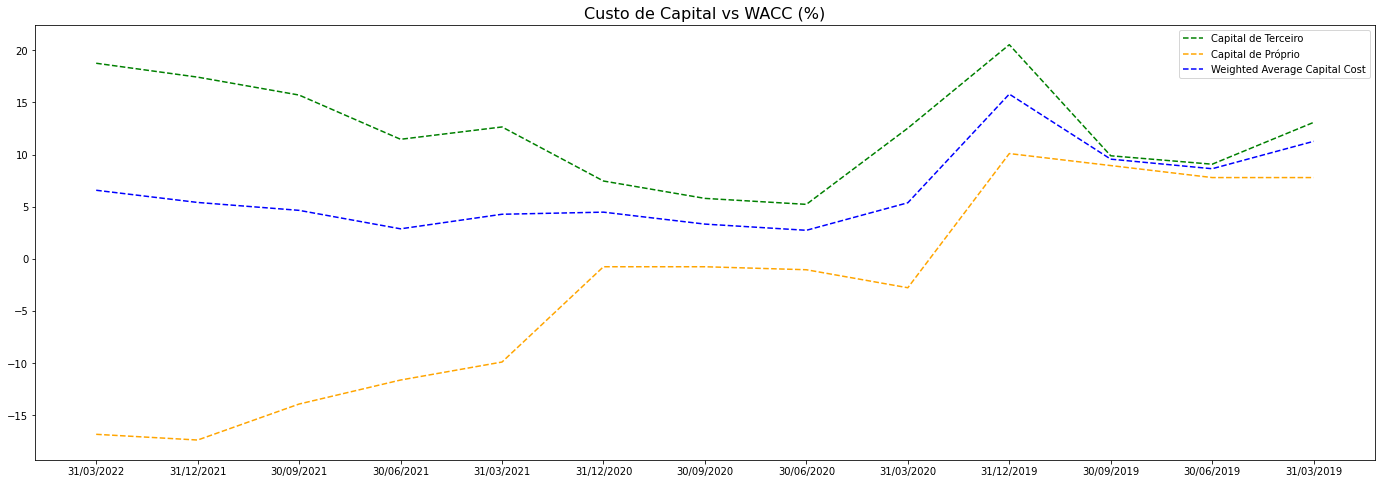

In [59]:
plt.figure(figsize=(24,8))
plt.title('Custo de Capital vs WACC (%)', size = 16)
# plt.plot(bp_dr['Ke'], '--', color='red')
plt.plot(bp_dr['kd']*100, '--', color='green')
plt.plot(bp_dr['Ke']*100, '--', color='orange')
plt.plot(bp_dr['Wacc']*100, '--', color='blue')
plt.legend([
    'Capital de Terceiro', 
    'Capital de Próprio',
    'Weighted Average Capital Cost'
    ], loc='upper right')
plt.show()
# INSIGHT: O Custo da Dívida da empresa Explodiu após 2020.

In [60]:
bp_dr = pd.concat([bp_dr, indice_lc], axis=1, join='inner')

# Aula 3

In [61]:
bp_dr.head().T

,31/03/2022,31/12/2021,30/09/2021,30/06/2021,31/03/2021
IPCA,0.032,0.0296,0.0302,0.0168,0.0205
IBOV,-0.015328,-0.031251,-0.031251,-0.031251,-0.031251
DOLAR,-0.073155,-0.048121,0.082862,-0.025073,-0.022781
PIB,0.047,0.046,0.039,0.019,-0.035
IGPM,0.054874,0.015359,0.007959,0.063059,0.082674
...,...,...,...,...,...
per_AC,43.923872,45.307846,40.506655,41.620065,43.672082
per_ANC,56.076127,54.692159,59.493347,58.379939,56.327917
per_PC,28.846156,27.846753,24.972838,22.769263,29.054865
per_PNC,36.925606,37.619379,37.710723,40.040128,33.807783


In [62]:
bp_dr = bp_dr.astype('float64')

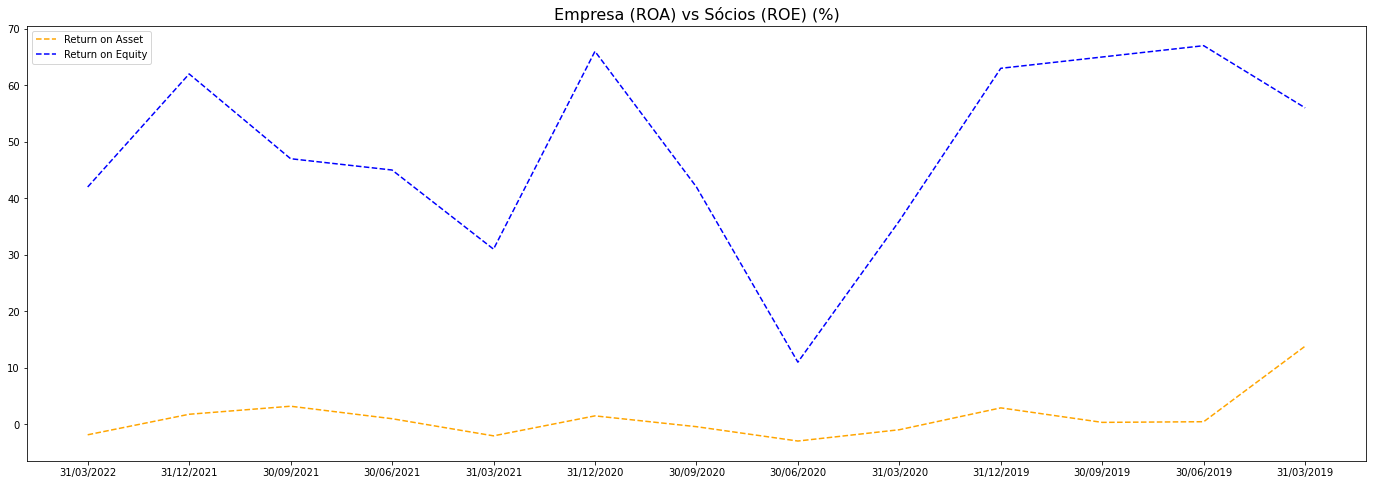

In [63]:
# Grafico
plt.figure(figsize=(24, 8))
plt.title('Empresa (ROA) vs Sócios (ROE) (%)', size = 16)
plt.plot(bp_dr['roa']*100,  '--', color='orange')
plt.plot(bp_dr['roe']*100, '--', color='blue')
plt.legend([
    'Return on Asset', 
    'Return on Equity',
    'Weighted Average Capital Cost'
    ], loc='upper left')
plt.show()
# A empresa mostra que remunera muito os sócios em detrimento da própria operação da empresa.

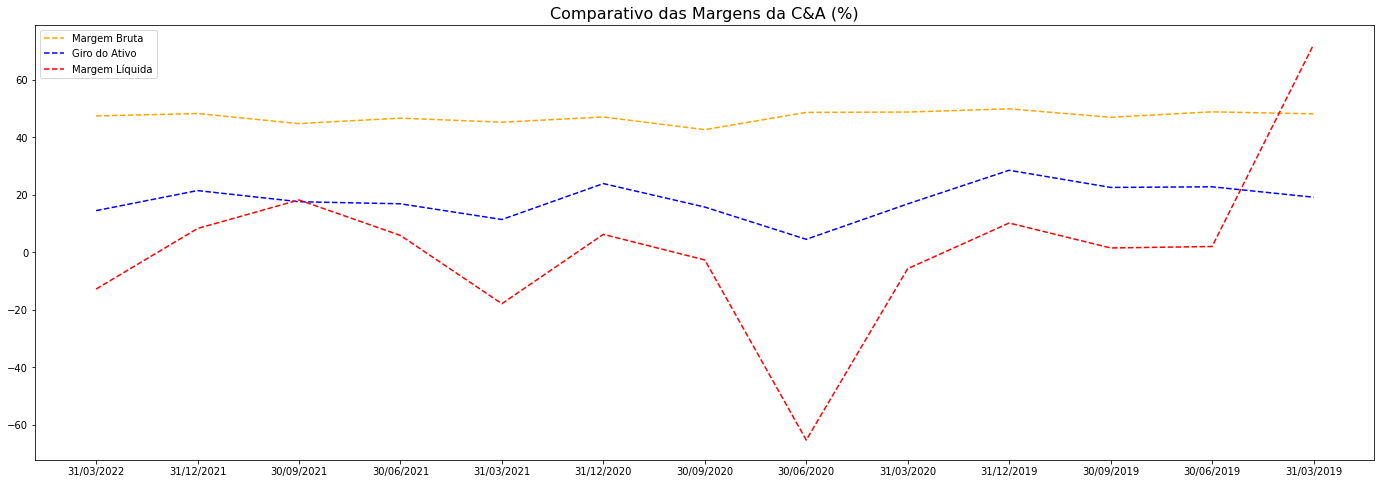

In [64]:
# Grafico
plt.figure(figsize=(24, 8))
plt.title('Comparativo das Margens da C&A (%)', size = 16)
plt.plot(bp_dr['mb']*100, '--', color='orange')
plt.plot(bp_dr['giro']*100, '--', color='blue')
plt.plot(bp_dr['ml']*100,'--', color='red')
plt.legend([
    'Margem Bruta', 
    'Giro do Ativo',
    'Margem Líquida'
    ], loc='upper left')
plt.show()

# INSIGHT:A estrutura de custos da empresa é pesada quando comparada com à margem líquida que em vários periodos demosntra que empresa obteve prejuizo.

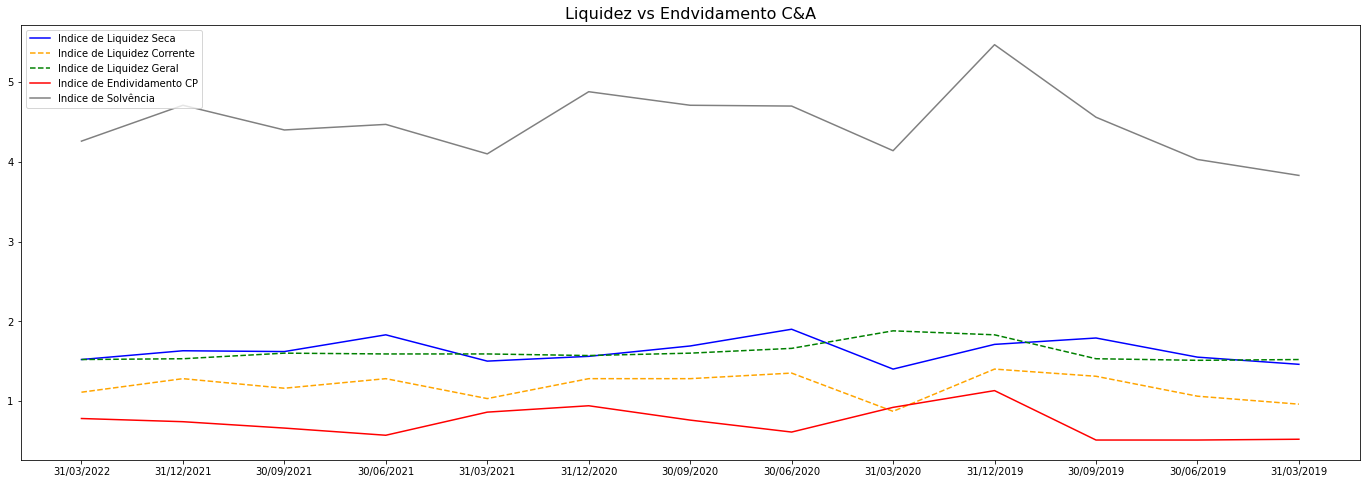

In [65]:
# Grafico
plt.figure(figsize=(24, 8))
plt.title('Liquidez vs Endvidamento C&A', size = 16)
plt.plot(bp_dr['ilc'], color='blue')
plt.plot(bp_dr['ils'], '--', color='orange')
plt.plot(bp_dr['ilg'],'--', color='green')
plt.plot(bp_dr['icc'], color='red')
plt.plot(bp_dr['kanitz'], color='gray')
plt.legend([
    'Indice de Liquidez Seca', 
    'Indice de Liquidez Corrente',
    'Indice de Liquidez Geral',
    'Indice de Endividamento CP',
    'Indice de Solvência'
    ], loc='upper left')
plt.show()

# INSIGTH: O indice de endividamento tem uma correlação inversa com o Indice de liquidez seca e Corrente. O Indece de Liquidez corrente Foi muito afetado pela COVID, chegando a ser abaixo de 1,00, 
#          prejudicando a capacidade de pagamento da empresa de curto Prazo.

Text(0.5, 1.0, 'Relação Lucro Economico vs WACC')

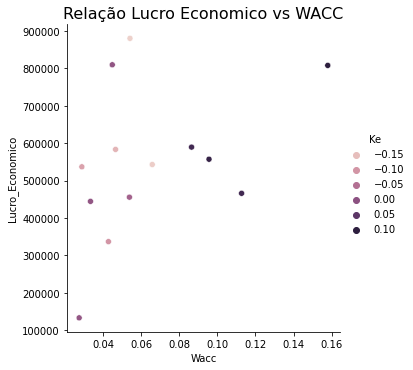

In [66]:
import seaborn as sns

sns.relplot(x = 'Wacc', 
           y = 'Lucro_Economico', 
           hue = 'Ke', 
           data = bp_dr)
plt.title('Relação Lucro Economico vs WACC', size = 16)

Text(0.5, 1.0, 'Relação Lucro Economico vs WACC')

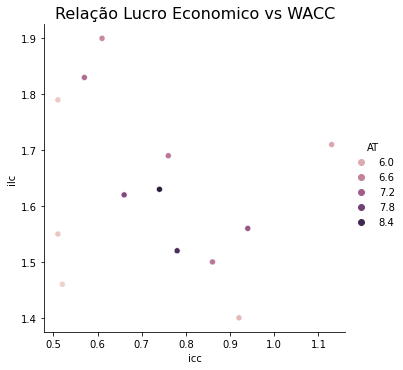

In [67]:
import seaborn as sns



sns.relplot(x = 'icc', 
           y = 'ilc', 
           hue = 'AT', 
           data = bp_dr)
plt.title('Relação Lucro Economico vs WACC', size = 16)

In [68]:
# Salvando o DF
bp_dr.to_csv('base_cea.csv', sep=';', encoding='utf-8')
bp_dr.to_excel('base_cea_data_studio.xlsx', encoding='utf-8')

In [69]:
round(bp_dr.corr(),2) 

,IPCA,IBOV,DOLAR,PIB,IGPM,SELIC,Receita,Custo,Despesa,Ativo_Total,Emprestimos_Financiamentos_cp,Emprestimos_Financiamentos_lp,Patrimonio_Liquido,i_trimestral,i_anual,kd,Ke,We,Wd,Wacc,co,cc,pmp,pmr,pme,girofinanceiro,VP_Receita,VP_Custo,Lucro_Economico,Receita,LB,LL,AT,AC,Estoque,ARLP,Permanente,Intangivel,PC,PNC,PL,ANC,PT,ilc,ils,ilg,icc,ipl,ge,roe,paybackRoe,roa,paybackRoa,kanitz,giro,mb,ml,per_AC,per_ANC,per_PC,per_PNC,per_PL
IPCA,1.00,-0.50,-0.35,0.30,0.28,0.44,0.64,-0.67,-0.27,0.76,-0.57,-0.51,0.54,0.56,0.56,0.56,-0.61,-0.29,0.29,-0.06,-0.50,-0.71,-0.03,-0.52,-0.50,0.58,0.65,-0.67,0.62,0.64,0.60,0.21,0.76,0.71,0.37,0.38,0.32,0.65,0.82,0.49,0.54,0.65,0.76,-0.36,0.01,-0.29,0.35,-0.09,0.31,0.33,-0.51,0.17,-0.45,0.10,0.29,-0.23,0.35,0.41,-0.41,0.68,-0.16,-0.29
IBOV,-0.50,1.00,0.20,-0.04,-0.38,-0.05,0.08,-0.03,-0.08,-0.80,0.22,0.08,-0.75,-0.10,-0.09,-0.09,0.94,0.04,-0.04,0.79,-0.20,0.03,-0.56,-0.04,-0.23,-0.28,0.05,-0.02,0.09,0.08,0.13,0.37,-0.80,-0.67,-0.91,-0.79,-0.00,-0.55,-0.67,-0.53,-0.75,-0.76,-0.80,-0.00,0.01,0.06,-0.14,0.48,-0.02,0.48,-0.19,0.42,0.36,0.05,0.50,0.46,0.33,-0.33,0.33,-0.37,0.18,0.04
DOLAR,-0.35,0.20,1.00,-0.04,-0.23,-0.30,-0.14,0.13,-0.15,-0.46,0.19,0.17,-0.03,-0.01,-0.01,-0.01,0.28,0.65,-0.65,0.14,-0.16,-0.01,-0.39,-0.24,-0.15,-0.38,-0.14,0.13,-0.15,-0.14,-0.14,0.17,-0.46,-0.48,-0.20,-0.07,-0.16,-0.46,-0.40,-0.62,-0.03,-0.33,-0.46,-0.28,-0.38,0.66,0.20,-0.26,-0.65,-0.11,-0.11,0.16,0.18,-0.09,0.08,-0.10,0.23,-0.35,0.35,-0.17,-0.38,0.65
PIB,0.30,-0.04,-0.04,1.00,-0.63,0.88,0.36,-0.34,-0.65,0.29,-0.76,-0.05,0.14,0.71,0.71,0.71,-0.33,-0.18,0.18,0.29,-0.30,-0.32,-0.19,-0.17,-0.32,0.05,0.35,-0.33,0.37,0.36,0.39,0.27,0.29,0.06,0.18,0.06,0.84,0.60,0.09,0.44,0.14,0.53,0.29,-0.09,-0.12,-0.14,-0.25,0.44,0.19,0.30,-0.33,0.25,-0.15,-0.16,0.26,0.32,0.34,-0.28,0.28,-0.23,0.26,-0.18
IGPM,0.28,-0.38,-0.23,-0.63,1.00,-0.40,-0.09,0.04,0.28,0.27,0.35,-0.01,0.23,-0.29,-0.28,-0.28,-0.22,-0.06,0.06,-0.42,0.00,-0.12,0.23,-0.09,0.02,0.06,-0.08,0.04,-0.12,-0.09,-0.14,-0.30,0.27,0.41,0.30,0.22,-0.61,-0.00,0.42,0.02,0.23,0.01,0.27,-0.05,0.09,-0.10,0.34,-0.43,0.05,-0.23,0.00,-0.27,-0.00,0.11,-0.23,-0.55,-0.18,0.49,-0.49,0.54,-0.26,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
per_AC,0.41,-0.33,-0.35,-0.28,0.49,-0.19,0.35,-0.36,-0.12,0.55,0.18,-0.04,0.66,0.14,0.15,0.15,-0.25,0.18,-0.18,-0.09,0.01,-0.12,0.23,-0.05,0.02,0.44,0.36,-0.36,0.34,0.35,0.33,-0.37,0.55,0.83,0.15,-0.11,-0.24,0.26,0.70,0.06,0.66,0.04,0.55,0.38,0.74,0.15,0.65,-0.61,-0.17,-0.02,0.08,-0.40,-0.18,0.84,0.09,-0.17,-0.38,1.00,-1.00,0.75,-0.55,0.18
per_ANC,-0.41,0.33,0.35,0.28,-0.49,0.19,-0.35,0.36,0.12,-0.55,-0.18,0.04,-0.66,-0.14,-0.15,-0.15,0.25,-0.18,0.18,0.09,-0.01,0.12,-0.23,0.05,-0.02,-0.44,-0.36,0.36,-0.34,-0.35,-0.33,0.37,-0.55,-0.83,-0.15,0.11,0.24,-0.26,-0.70,-0.06,-0.66,-0.04,-0.55,-0.38,-0.74,-0.15,-0.65,0.61,0.17,0.02,-0.08,0.40,0.18,-0.84,-0.09,0.17,0.38,-1.00,1.00,-0.75,0.55,-0.18
per_PC,0.68,-0.37,-0.17,-0.23,0.54,-0.01,0.44,-0.45,-0.22,0.56,0.02,-0.38,0.66,0.34,0.35,0.35,-0.34,0.19,-0.19,-0.03,-0.25,-0.44,0.15,-0.32,-0.23,0.53,0.45,-0.45,0.44,0.44,0.42,-0.23,0.56,0.73,0.24,-0.01,-0.08,0.39,0.84,-0.04,0.66,0.19,0.56,-0.32,0.14,0.18,0.84,-0.49,-0.18,0.08,-0.21,-0.25,-0.34,0.44,0.18,-0.14,-0.11,0.75,-0.75,1.00,-0.69,0.19
per_PNC,-0.16,0.18,-0.38,0.26,-0.26,0.33,-0.16,0.14,0.32,-0.11,-0.20,0.16,-0.65,-0.30,-0.31,-0.31,0.05,-0.84,0.84,-0.10,0.02,0.08,-0.07,0.10,0.01,-0.11,-0.16,0.14,-0.18,-0.16,-0.18,0.27,-0.11,-0.32,-0.06,0.18,0.30,0.07,-0.38,0.59,-0.65,0.20,-0.11,0.19,-0.06,-0.83,-0.96,0.79,0.83,0.18,-0.05,0.29,0.34,-0.53,-0.11,-0.13,0.23,-0.55,0.55,-0.69,1.00,-0.84


<AxesSubplot:>

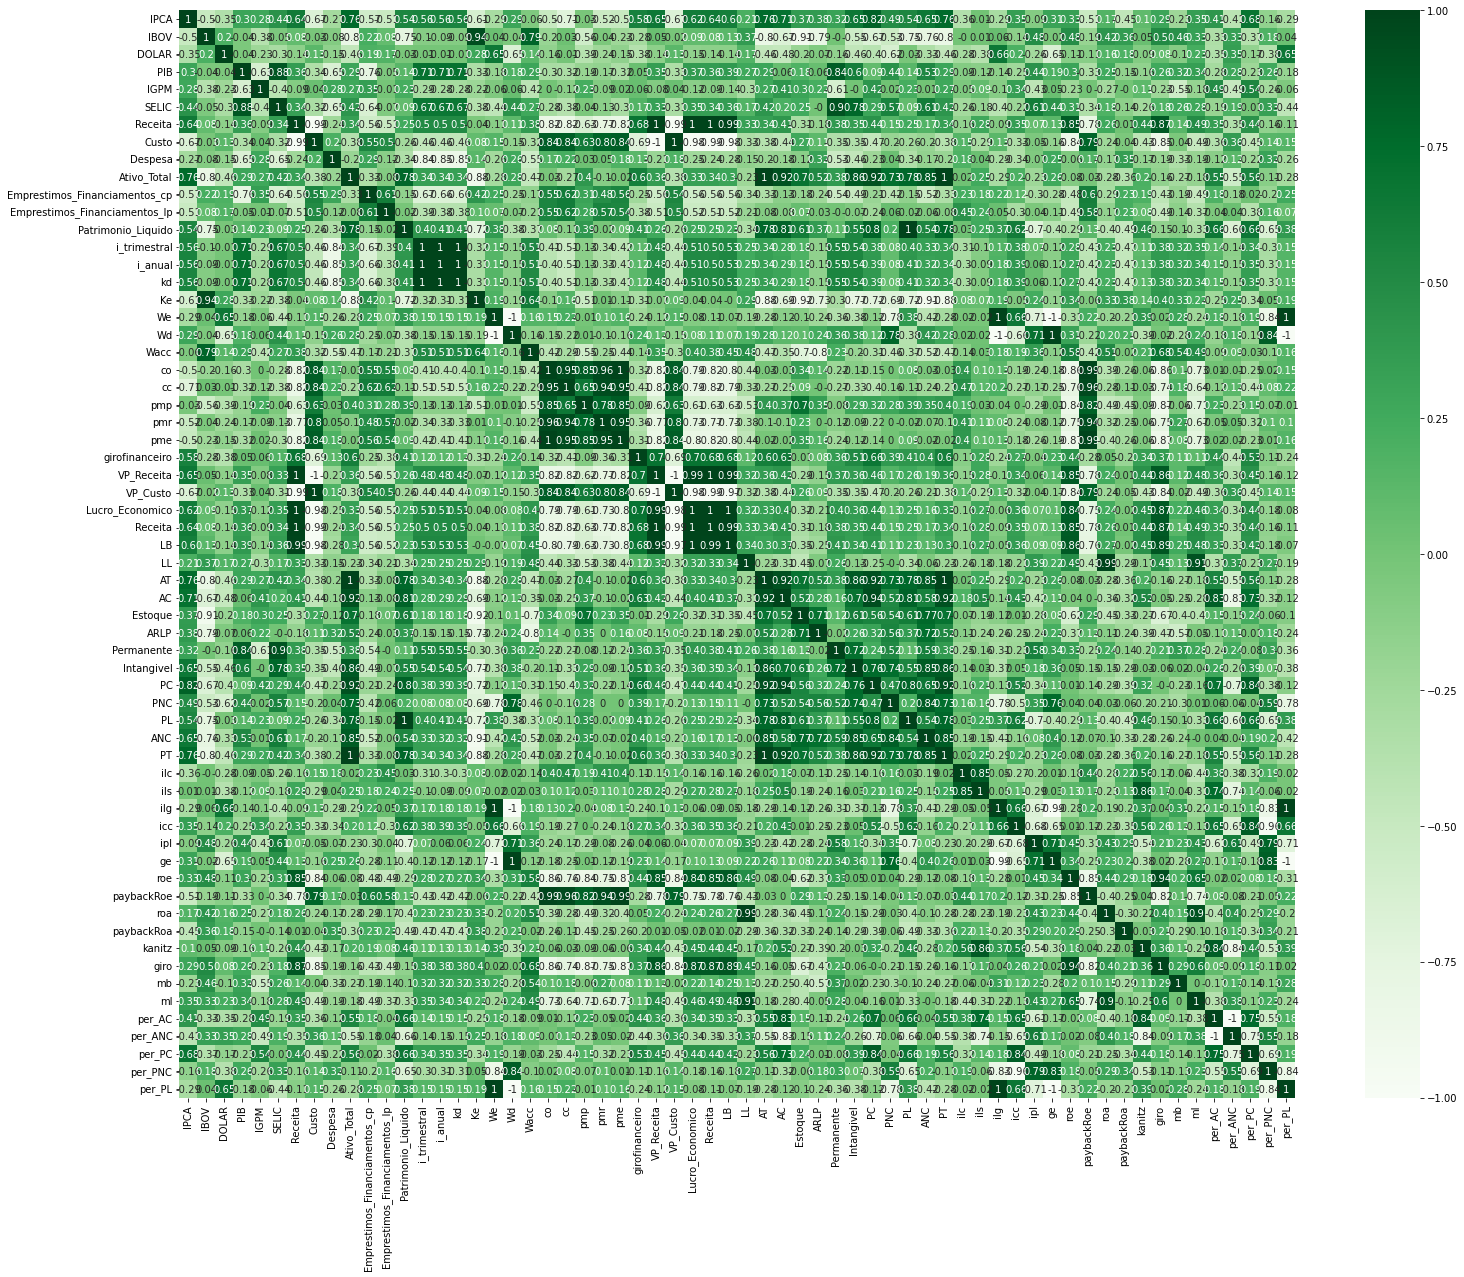

In [70]:
plt.figure(figsize=(25, 20))
sns.heatmap(round(bp_dr.corr(),2), annot=True, cmap='Greens')

In [82]:
bp_dr.columns

Index(['IPCA', 'IBOV', 'DOLAR', 'PIB', 'IGPM', 'SELIC', 'Receita', 'Custo',
       'Despesa', 'Ativo_Total', 'Emprestimos_Financiamentos_cp',
       'Emprestimos_Financiamentos_lp', 'Patrimonio_Liquido', 'i_trimestral',
       'i_anual', 'kd', 'Ke', 'We', 'Wd', 'Wacc', 'co', 'cc', 'pmp', 'pmr',
       'pme', 'girofinanceiro', 'VP_Receita', 'VP_Custo', 'Lucro_Economico',
       'Receita', 'LB', 'LL', 'AT', 'AC', 'Estoque', 'ARLP', 'Permanente',
       'Intangivel', 'PC', 'PNC', 'PL', 'ANC', 'PT', 'ilc', 'ils', 'ilg',
       'icc', 'ipl', 'ge', 'roe', 'paybackRoe', 'roa', 'paybackRoa', 'kanitz',
       'giro', 'mb', 'ml', 'per_AC', 'per_ANC', 'per_PC', 'per_PNC', 'per_PL'],
      dtype='object')

In [90]:
lista = " 'IPCA', 'IBOV', 'DOLAR', 'PIB', 'IGPM', 'SELIC', 'Receita', 'Custo', 'Despesa', 'Ativo_Total', 'Emprestimos_Financiamentos_cp','Emprestimos_Financiamentos_lp', 'Patrimonio_Liquido', 'i_trimestral', 'i_anual', 'kd', 'Ke', 'We', 'Wd', 'Wacc', 'co', 'cc', 'pmp', 'pmr', 'pme', 'girofinanceiro', 'VP_Receita', 'VP_Custo', 'Lucro_Economico', 'Receita', 'LB', 'LL', 'AT', 'AC', 'Estoque', 'ARLP', 'Permanente', 'Intangivel', 'PC', 'PNC', 'PL', 'ANC', 'PT', 'ilc', 'ils', 'ilg', 'icc', 'ipl', 'ge', 'roe', 'paybackRoe', 'roa', 'paybackRoa', 'kanitz', 'giro', 'mb', 'ml', 'per_AC', 'per_ANC', 'per_PC', 'per_PNC', 'per_PL' "

lista = lista.replace("'", "").replace(",", " +")
lista

' IPCA + IBOV + DOLAR + PIB + IGPM + SELIC + kd + Ke + We + Wd + Wacc + co + cc + pmp + pmr + pme + girofinanceiro + VP_Receita + VP_Custo + Lucro_Economico + Receita + LB + LL + AT + AC + Estoque + ARLP + Permanente + Intangivel + PC + PNC + PL + ANC + PT + ilc + ils + ilg + icc + ipl + ge + roe + paybackRoe + roa + paybackRoa + kanitz + giro + mb + ml + per_AC + per_ANC + per_PC + per_PNC + per_PL '

In [130]:
model = smf.ols(formula='Lucro_Economico ~ IPCA + SELIC + co + kanitz + kd + Ke', data=bp_dr)
resultado = model.fit()
print(resultado.summary())
print(f'O valor de AIC é de {resultado.aic}')

2022-07-11 23:34:38,443 [34929] WARNING  py.warnings:109: [JupyterRequire] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



                            OLS Regression Results                            
Dep. Variable:        Lucro_Economico   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     7.076
Date:                Mon, 11 Jul 2022   Prob (F-statistic):             0.0156
Time:                        23:34:38   Log-Likelihood:                -163.19
No. Observations:                  13   AIC:                             340.4
Df Residuals:                       6   BIC:                             344.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.516e+05   3.56e+05     -0.988      0.3

In [176]:
model = smf.ols(formula='Lucro_Economico ~ Wacc', data=bp_dr)
resultado = model.fit()
print(resultado.summary())
print(f'O valor de AIC é de {resultado.aic}')

2022-07-12 21:38:14,137 [34929] WARNING  py.warnings:109: [JupyterRequire] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



                            OLS Regression Results                            
Dep. Variable:        Lucro_Economico   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.055
Date:                Tue, 12 Jul 2022   Prob (F-statistic):              0.180
Time:                        21:38:14   Log-Likelihood:                -175.66
No. Observations:                  13   AIC:                             355.3
Df Residuals:                      11   BIC:                             356.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.121e+05    1.1e+05      3.743      0.0

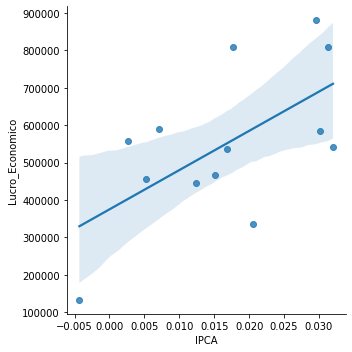

In [174]:
sns.lmplot(x = 'IPCA', y = 'Lucro_Economico', data= bp_dr)

In [73]:
print(resultado.aic)

298.5184851204033


In [74]:
X = bp_dr.drop(columns=[ 'Lucro_Economico'], axis=1)
y = bp_dr['Lucro_Economico']

model = smf.ols(formula='y ~ X',data=bp_dr)
resultado = model.fit()
print(resultado.summary())
print(f'O valor de AIC é de {resultado.aic}')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                nan
Time:                        22:53:30   Log-Likelihood:                 212.89
No. Observations:                  13   AIC:                            -399.8
Df Residuals:                       0   BIC:                            -392.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.226e-07        inf          0        n